# Voter System Proposal Simulation

Joshua Sanz, Robert Wang, Victor Han

In [34]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats


%load_ext autoreload
%autoreload 2
from VoterModel import VoterModel

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
plt.rcParams['figure.figsize'] = 12, 8

In [21]:
er = nx.erdos_renyi_graph(50, 0.15)

In [29]:
er.edges

EdgeView([(0, 4), (0, 9), (0, 11), (0, 19), (0, 21), (0, 25), (0, 28), (0, 39), (1, 23), (1, 34), (1, 38), (1, 49), (2, 11), (2, 16), (2, 26), (2, 41), (3, 7), (3, 19), (3, 27), (3, 28), (3, 31), (3, 32), (3, 33), (3, 34), (3, 36), (3, 40), (3, 41), (3, 49), (4, 16), (4, 20), (4, 29), (4, 36), (4, 39), (5, 9), (5, 14), (5, 16), (5, 20), (5, 21), (5, 23), (5, 25), (5, 39), (5, 40), (5, 45), (5, 47), (5, 49), (6, 10), (6, 14), (6, 19), (6, 23), (6, 33), (6, 37), (6, 42), (6, 48), (7, 9), (7, 10), (7, 15), (7, 16), (7, 22), (7, 30), (7, 43), (8, 9), (8, 12), (8, 13), (8, 14), (8, 22), (8, 25), (8, 26), (8, 27), (8, 28), (8, 29), (8, 35), (8, 43), (8, 45), (8, 49), (9, 17), (9, 25), (9, 32), (9, 35), (9, 46), (10, 16), (10, 17), (10, 28), (10, 36), (10, 37), (10, 40), (10, 48), (11, 45), (12, 15), (12, 30), (12, 35), (12, 38), (13, 14), (13, 33), (13, 38), (13, 40), (14, 29), (14, 46), (15, 16), (15, 17), (15, 20), (15, 21), (15, 22), (15, 30), (15, 35), (15, 42), (15, 45), (16, 17), (16, 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


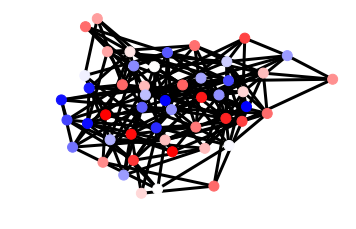

In [28]:
options = {
    'node_color': np.random.rand(50),
    'node_size': 100,
    'width': 3,
    'cmap': 'bwr'
}
plt.subplot(221)
nx.draw(er, **options)

In [35]:
vm = VoterModel(voting='simple')
vm.initialize('all_rand')
vm.draw()

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>